In [53]:
# PROBLEM 1
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
data = pd.DataFrame({"Age": [25,56,65,32,41,49],"Income":[49000,156000,99000,92000,39000,57000]})

# Using standard scalar
scaler = StandardScaler()
standardized_data = norm_df = pd.DataFrame(scaler.fit_transform(data), index=data.index, columns=data.columns)
print("StandardScaler: \n", standardized_data, "\n")

# Using minmax
scaler = MinMaxScaler()
standardized_data2 = pd.DataFrame(scaler.fit_transform(data), index=data.index, columns=data.columns)
print("MinMaxScaler: \n",standardized_data2, "\n")

# using robust scalar
transformer = RobustScaler().fit(data)
normalized_data = transformer.transform(data)
print("Using robust scalar: \n",normalized_data, "\n")

# Normalizing a data frame using pandas
norm_df = (data - data.mean()) / data.std()
print("Normalized data using Panda : \n", norm_df, "\n" )

# Rescaling using pandas
recaled_df = (data - data.min()) / (data.max() - data.min())
print("Rescaled data using Panda : \n", recaled_df, "\n" )

StandardScaler: 
         Age    Income
0 -1.438597 -0.832491
1  0.829022  1.866799
2  1.487363  0.428859
3 -0.926554  0.252270
4 -0.268213 -1.084762
5  0.316979 -0.630675 

MinMaxScaler: 
      Age    Income
0  0.000  0.085470
1  0.775  1.000000
2  1.000  0.512821
3  0.175  0.452991
4  0.400  0.000000
5  0.600  0.153846 

Using robust scalar: 
 [[-1.         -0.55135135]
 [ 0.55        1.76216216]
 [ 1.          0.52972973]
 [-0.65        0.37837838]
 [-0.2        -0.76756757]
 [ 0.2        -0.37837838]] 

Normalized data using Panda : 
         Age    Income
0 -1.313253 -0.759957
1  0.756790  1.704147
2  1.357770  0.391493
3 -0.845824  0.230290
4 -0.244844 -0.990247
5  0.289361 -0.575725 

Normalized data using Panda : 
      Age    Income
0  0.000  0.085470
1  0.775  1.000000
2  1.000  0.512821
3  0.175  0.452991
4  0.400  0.000000
5  0.600  0.153846 



In [16]:
# PROBLEM 2 Sub-problem-1:
# Creating binary dummy variables for three categorical variables
import pandas as pd
cars_data = pd.read_csv('/Users/nivethida/Downloads/ToyotaCorolla___(1).csv')
print(cars_data.head(5))
print(pd.get_dummies(cars_data.Fuel_Type))
print(pd.get_dummies(cars_data.Color))
print(pd.get_dummies(cars_data.Model))


   Id                                          Model    Price  Age_08_04  \
0   1  TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13500.0         23   
1   2  TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13750.0         23   
2   3  TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13950.0         24   
3   4  TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  14950.0         26   
4   5    TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors  13750.0         30   

   Mfg_Month  Mfg_Year     KM Fuel_Type  HP  Met_Color  ... Powered_Windows  \
0         10      2002  46986    Diesel  90          1  ...               1   
1         10      2002  72937    Diesel  90          1  ...               0   
2          9      2002  41711    Diesel  90          1  ...               0   
3          7      2002  48000    Diesel  90          0  ...               0   
4          3      2002  38500    Diesel  90          0  ...               1   

   Power_Steering  Radio  Mistlamps  Sport_Model  Backseat_Divider  

In [17]:
# PROBLEM 2 Sub-problem-2:
# Partitioning the dataset 
from sklearn.model_selection import train_test_split
cars_data = pd.read_csv('/Users/nivethida/Downloads/ToyotaCorolla___(1).csv')
trainData, temp = train_test_split(cars_data, test_size=0.5, random_state=1)
validData, testData  = train_test_split(cars_data, test_size=0.3, random_state=1)
print('Training Data: ', trainData.shape) 
print('Validation Data: ', validData.shape)
print('Test Data: ', testData.shape)


Training Data:  (718, 39)
Validation Data:  (1005, 39)
Test Data:  (431, 39)


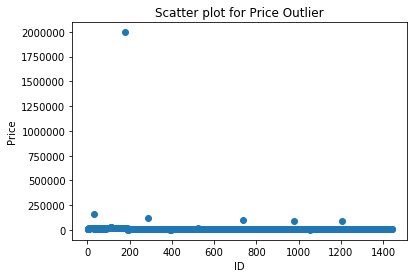

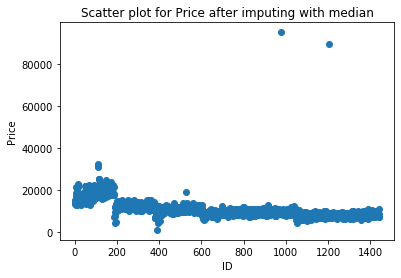

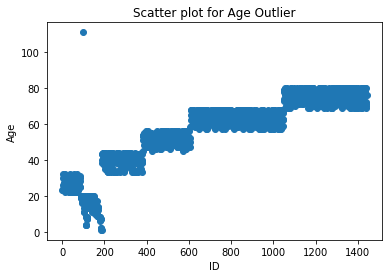

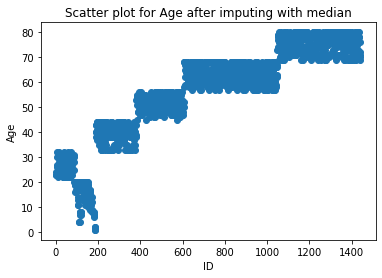

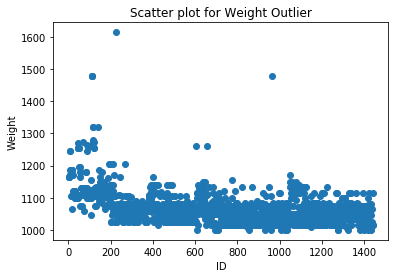

1615


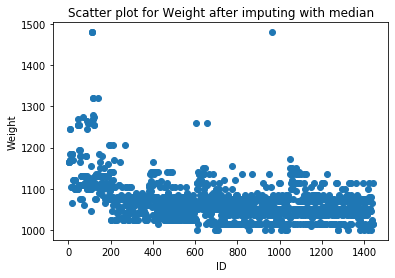

In [30]:
# PROBLEM 2 Sub-problem-3:
# Exploring the data for the outliers
import matplotlib.pyplot as plt
import numpy as np
np.warnings.filterwarnings('ignore')
cars_data = pd.read_csv('/Users/nivethida/Downloads/ToyotaCorolla___(1).csv')

# Finding outlier in Price
plt.scatter(x=cars_data['Id'], y=cars_data['Price'])
plt.title('Scatter plot for Price Outlier')
plt.xlabel('ID')
plt.ylabel('Price')
plt.show()

# Creating Indicator for outlier
cars_data.loc[cars_data['Price'] > 100000, 'Price_outlier'] = 1

# Considering all values greater than 100000 as outliers and filling it with null values
cars_data.loc[cars_data['Price'] > 100000, 'Price'] = np.nan

# Judging the outlier as data error and replacing it with median value
median_Price = cars_data['Price'].median()
cars_data['Price'].fillna(value=median_Price)
plt.scatter(x=cars_data['Id'], y=cars_data['Price'])
plt.title('Scatter plot for Price after imputing with median')
plt.xlabel('ID')
plt.ylabel('Price')
plt.show()

# Finding outlier in age
plt.scatter(x=cars_data['Id'], y=cars_data['Age_08_04'])
plt.title('Scatter plot for Age Outlier')
plt.xlabel('ID')
plt.ylabel('Age')
plt.show()

# Creating Indicator for outlier
cars_data.loc[cars_data['Age_08_04'] > 100, 'Age_outlier'] = 1

# Considering all values greater than 100 as outliers and filling it with null values
cars_data.loc[cars_data['Age_08_04'] > 100, 'Age_08_04'] = np.nan

# Judging the outlier as data error and replacing it with median value
median_Age = cars_data['Age_08_04'].median()
cars_data['Age_08_04'].fillna(value=median_Age)
plt.scatter(x=cars_data['Id'], y=cars_data['Age_08_04'])
plt.title('Scatter plot for Age after imputing with median')
plt.xlabel('ID')
plt.ylabel('Age')
plt.show()

# Finding outlier in Weight
plt.scatter(x=cars_data['Id'], y=cars_data['Weight'])
plt.title('Scatter plot for Weight Outlier')
plt.xlabel('ID')
plt.ylabel('Weight')
plt.show()
max_Weight = cars_data['Weight'].max()

# Creating Indicator for outlier
cars_data.loc[cars_data['Weight'] > 1600, 'Weight'] = 1
cars_data.loc[cars_data['Weight'] < 200, 'Weight'] = 1

# Considering all values greater than 1600 or less than 200 as outliers and filling it with null values
median_val = cars_data['Weight'].median()
cars_data.loc[cars_data['Weight'] > 1600, 'Weight'] = np.nan
cars_data.loc[cars_data['Weight'] < 200, 'Weight'] = np.nan

# Judging the outlier as data error and replacing it with median value
cars_data['Weight'].replace(max_Weight, np.nan, inplace=True)
median_Weight = cars_data['Weight'].median()
cars_data['Weight'].fillna(value=median_Weight)
plt.scatter(x=cars_data['Id'], y=cars_data['Weight'])
plt.title('Scatter plot for Weight after imputing with median')
plt.xlabel('ID')
plt.ylabel('Weight')
plt.show()

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5,
        33.5, 34.5, 35.5, 36.5, 37.5, 38.5]),
 <a list of 39 Text xticklabel objects>)

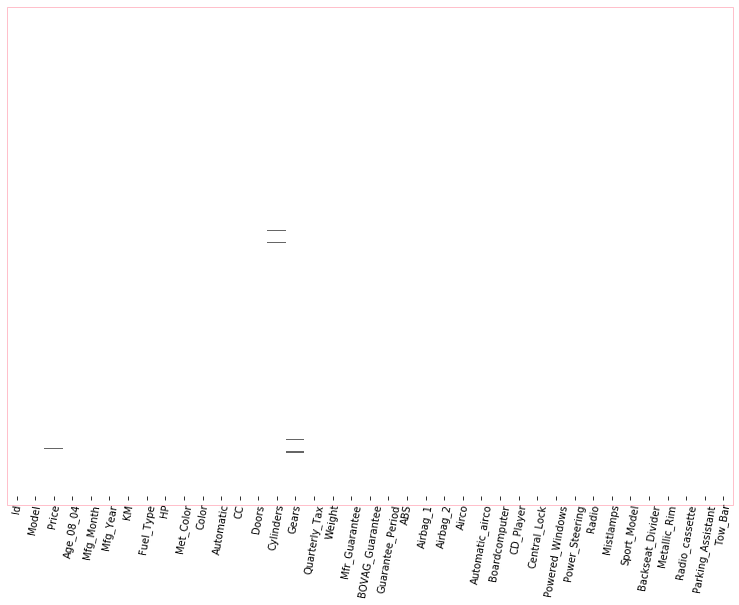

In [39]:
# PROBLEM 2 
# Sub-problem-4:
# Exploring the data for missing values
import numpy as np
import seaborn as sns
car_df = pd.read_csv('/Users/nivethida/Downloads/ToyotaCorolla___(1).csv').sort_values(['Mfg_Year'])
naInfo = np.zeros(car_df.shape)

# Filling the missing values with 1
naInfo[car_df.isna().values] = 1
naInfo = pd.DataFrame(naInfo, columns=car_df.columns)
fig, ax = plt.subplots()
fig.set_size_inches(13, 9)

# Plotting the heat map
ax = sns.heatmap(naInfo, vmin=0, vmax=1, cmap=['white', '#666666'], cbar=False, ax=ax)
ax.set_yticks([])
rect = plt.Rectangle((0, 0), naInfo.shape[1], naInfo.shape[0], linewidth=1, edgecolor='pink', facecolor='none')
rect = ax.add_patch(rect)
rect.set_clip_on(False)
plt.xticks(rotation=80)


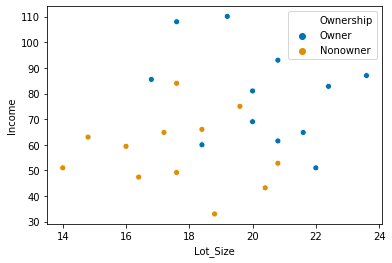

In [2]:
# Problem 3
# Creating a scatter plot of Lot Size vs. Income, color-coded by the outcome variable owner/nonowner
import seaborn as sns
import pandas as pd

# Read using pandas
df = pd.read_csv('/Users/nivethida/Downloads/RidingMowers.csv')

# Display with seaborn scatterplot using ownership in hue
sns.scatterplot(x="Lot_Size", y="Income", hue="Ownership",
              data=df, palette='colorblind', legend='full')

Cleaned up colums 
             date  configuration customer_postcode store_postcode  \
0  1/1/2008 0:01            163          EC4V 5BH        SE1 2BN   
1  1/1/2008 0:02            320           SW4 0JL       SW12 9HD   
2  1/1/2008 0:04             23          EC3V 1LR         E2 0RY   
3  1/1/2008 0:04            169          SW1P 3AU        SE1 2BN   
4  1/1/2008 0:06            365          EC4V 4EG       SW1V 4QQ   

   retail_price  screen_size_inches  battery_life_hours  ram_gb  \
0           455                  15                   5       1   
1           545                  15                   6       1   
2           515                  15                   4       1   
3           395                  15                   5       1   
4           585                  15                   6       2   

   processor_speeds_ghz integrated_wireless  hd_size_gb bundled_applications  \
0                   2.0                 Yes          80                  Yes   
1       

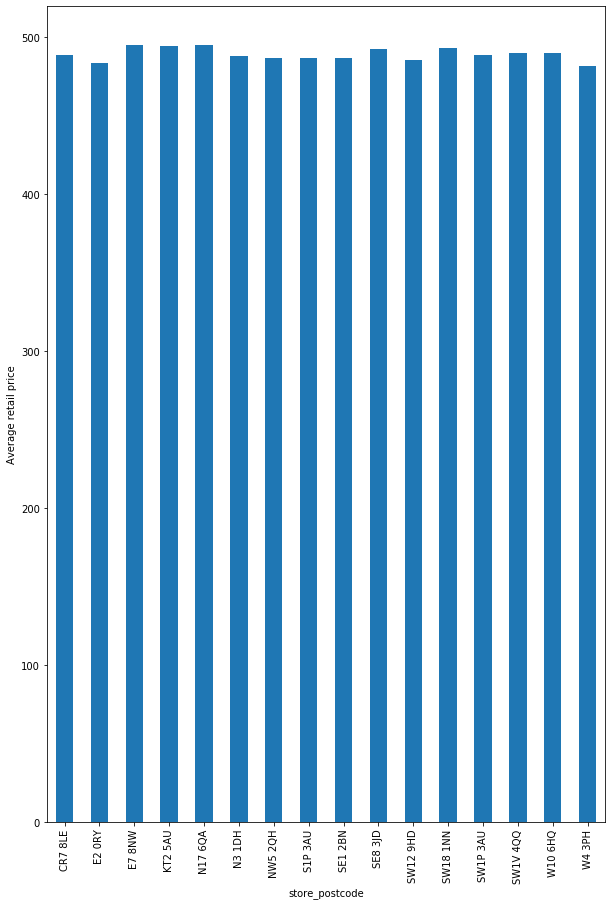

In [59]:
# Problem 4
import matplotlib.pyplot as plt
laptop_df =  pd.read_csv('/Users/nivethida/Downloads/LaptopSalesJanuary2008.csv')

# Sub-problem-1: Clean up column headers
laptop_df.columns = laptop_df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace("?","")
print("Cleaned up colums \n",laptop_df.head())

# Sub-problem-2: Bar chart with the average retail price by store
data_plot = laptop_df.groupby('store_postcode').mean()['retail_price']
axis = data_plot.plot(kind='bar', figsize=[10, 15])
axis.set_ylabel('Average retail price')
print("Average values: \n", data_plot)
print("Maximum value : ", max(data_plot)) #Store E7 8NW has highest average
print("Minimum value : ", min(data_plot)) #Store W4 3PH has lowest average



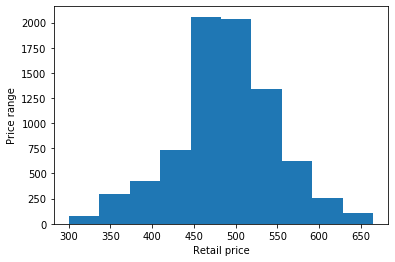

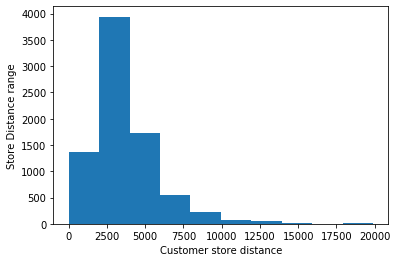

In [5]:
# Problem 4
# Sub-problem-3: Histograms for Retail Price, CustomerStoreDistance
from matplotlib import pyplot as plt
import numpy as np
laptop_df =  pd.read_csv('/Users/nivethida/Downloads/LaptopSalesJanuary2008.csv')
laptop_df.head(5)

# Create histograms for Retail Price
fig, ax = plt.subplots()
ax.hist(laptop_df['Retail Price'])
ax.set_xlabel('Retail price')
ax.set_ylabel('Price range')
plt.show()

# Create histograms for CustomerStoreDistance
fig, ax = plt.subplots()
ax.hist(laptop_df['CustomerStoreDistance'])
ax.set_xlabel('Customer store distance')
ax.set_ylabel('Store Distance range')
plt.show()